<a href="https://colab.research.google.com/github/christiangarza1505813/PCD/blob/main/Tarea%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk
!pip install PyPDF2
!pip install emoji
!pip install wordcloud



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 11.1 MB/s eta 0:00:00


In [25]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.stem import PorterStemmer
from PyPDF2 import PdfReader
from collections import Counter
from wordcloud import WordCloud
import emoji
import matplotlib.pyplot as plt

In [15]:
nltk.download('punkt_tab')

nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:

# Subir archivos PDF
from google.colab import files
uploaded = files.upload()


Saving LibrodelMormon.pdf to LibrodelMormon.pdf
Saving Bilbia_nuevotestamento.pdf to Bilbia_nuevotestamento.pdf


In [20]:
# Función para leer texto desde PDF
def extract_text_from_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    text = ""
    for page in reader.pages:
        text += page.extract_text()
    return text


In [21]:
# Leer los textos de los dos PDFs
pdf_files = list(uploaded.keys())
text1 = extract_text_from_pdf(pdf_files[0])
text2 = extract_text_from_pdf(pdf_files[1])

In [22]:
# Función de limpieza y preprocesamiento de texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-Z\s\.,;:\'"!?()\[\]{}<>]+', '', text, flags=re.UNICODE)
    # Tokenización
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('spanish')) #Limpieza de datos: eliminación de signos de puntuación, números, palabras vacías (stopwords).
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Preprocesar los textos
tokens1 = preprocess_text(text1)
tokens2 = preprocess_text(text2)


In [31]:
stemmer = PorterStemmer()

# Función de limpieza y preprocesamiento con stemming
def preprocess_text_with_stemming(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenización
    tokens = word_tokenize(text)
    # Aplicar stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens if len(word) > 3]
    return stemmed_tokens

# Preprocesar los textos con stemming
stemmed_tokens1 = preprocess_text_with_stemming(text1)
stemmed_tokens2 = preprocess_text_with_stemming(text2)

In [32]:
# Analizar estadísticas descriptivas básicas
def analyze_statistics(tokens, text_name):
    print(f"--- Estadísticas para {text_name} ---")
    print(f"Número total de palabras: {len(tokens)}")
    print(f"Número de palabras únicas: {len(set(tokens))}")
    print(f"Promedio de longitud de palabras: {sum(len(word) for word in tokens) / len(tokens):.2f}")

# Aplicar análisis a cada texto
analyze_statistics(stemmed_tokens1, pdf_files[0])
analyze_statistics(stemmed_tokens2, pdf_files[1])

--- Estadísticas para LibrodelMormon.pdf ---
Número total de palabras: 288997
Número de palabras únicas: 19839
Promedio de longitud de palabras: 5.91
--- Estadísticas para Bilbia_nuevotestamento.pdf ---
Número total de palabras: 103303
Número de palabras únicas: 11452
Promedio de longitud de palabras: 5.74


In [34]:
# Frecuencia de palabras
def analyze_frequencies(tokens, text_name, n=20):
    print(f"\n--- Frecuencia de palabras más comunes en {text_name} ---")
    freq_dist = FreqDist(tokens)
    for word, freq in freq_dist.most_common(n):
        print(f"{word}: {freq}")

# Aplicar análisis de frecuencia
analyze_frequencies(stemmed_tokens1, pdf_files[0])
analyze_frequencies(stemmed_tokens2, pdf_files[1])


--- Frecuencia de palabras más comunes en LibrodelMormon.pdf ---
para: 5247
dio: 3863
seor: 3280
tierra: 2724
alma: 2592
todo: 2201
porqu: 2170
tambin: 2135
pueblo: 2073
como: 2052
hijo: 2043
hombr: 2026
esta: 1984
toda: 1947
sobr: 1692
cosa: 1609
ello: 1487
palabra: 1408
padr: 1406
est: 1378

--- Frecuencia de palabras más comunes en Bilbia_nuevotestamento.pdf ---
dio: 1680
para: 1655
porqu: 1363
pero: 1019
jess: 998
todo: 986
dijo: 980
como: 844
vosotro: 806
seor: 777
hijo: 752
hombr: 689
ello: 685
tambin: 679
juan: 594
entonc: 590
cristo: 561
cuando: 561
toda: 547
esto: 536


In [35]:
# Generar n-gramas
def analyze_ngrams(tokens, n, text_name):
    print(f"\n--- {n}-gramas más comunes en {text_name} (con stemming) ---")
    ngram_counts = Counter(ngrams(tokens, n))
    for ngram, count in ngram_counts.most_common(10):
        print(f"{' '.join(ngram)}: {count}")

# Aplicar análisis de n-gramas
analyze_ngrams(stemmed_tokens1, 2, pdf_files[0])  # Bigramas
analyze_ngrams(stemmed_tokens2, 2, pdf_files[1])  # Bigramas


--- 2-gramas más comunes en LibrodelMormon.pdf (con stemming) ---
vase tambin: 643
esta cosa: 437
toda cosa: 421
alma alma: 405
ahora bien: 396
espritu santo: 395
libro mormn: 298
seor dio: 284
cierto digo: 271
doctrina convenio: 268

--- 2-gramas más comunes en Bilbia_nuevotestamento.pdf (con stemming) ---
jess dijo: 166
espritu santo: 156
esta cosa: 153
toda cosa: 125
hijo hombr: 109
reino dio: 91
vida eterna: 86
uno otro: 85
seor jesucristo: 79
hijo dio: 78


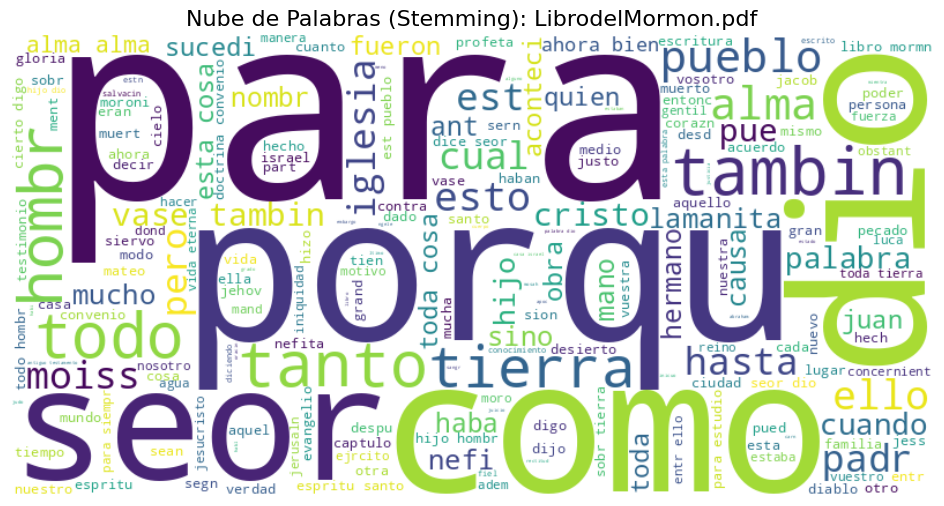

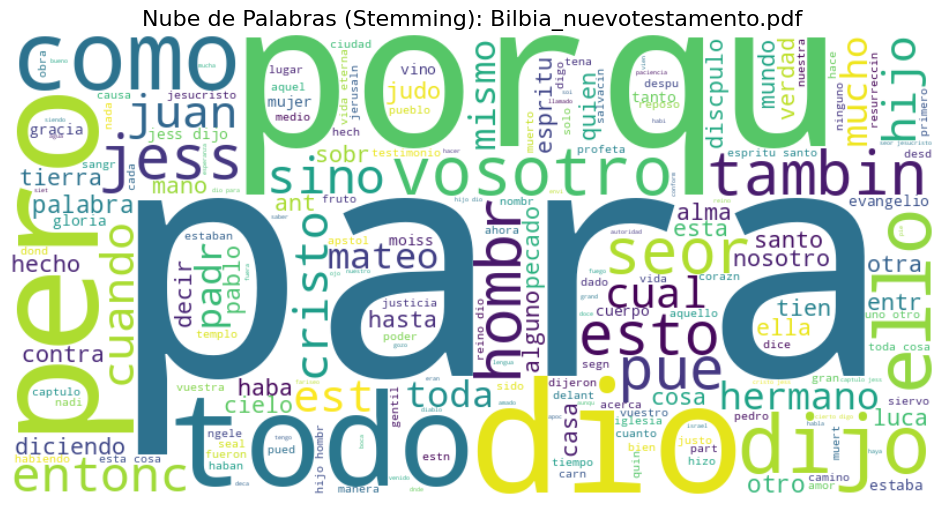

In [37]:
# Generar nubes de palabras
def generate_wordcloud(tokens, text_name):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis'
    ).generate(" ".join(tokens))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Nube de Palabras (Stemming): {text_name}", fontsize=16)
    plt.axis('off')
    plt.show()

# Crear nubes de palabras
generate_wordcloud(stemmed_tokens1, pdf_files[0])
generate_wordcloud(stemmed_tokens2, pdf_files[1])

In [23]:


# Analizar estadísticas descriptivas básicas
def analyze_statistics(tokens, text_name):
    print(f"--- Estadísticas para {text_name} ---")
    print(f"Número total de palabras: {len(tokens)}")
    print(f"Número de palabras únicas: {len(set(tokens))}")
    print(f"Promedio de longitud de palabras: {sum(len(word) for word in tokens) / len(tokens):.2f}")

# Aplicar análisis a cada texto
analyze_statistics(tokens1, pdf_files[0])
analyze_statistics(tokens2, pdf_files[1])

--- Estadísticas para LibrodelMormon.pdf ---
Número total de palabras: 463317
Número de palabras únicas: 23928
Promedio de longitud de palabras: 4.17
--- Estadísticas para Bilbia_nuevotestamento.pdf ---
Número total de palabras: 163064
Número de palabras únicas: 13841
Promedio de longitud de palabras: 4.04


In [24]:

# Frecuencia de palabras
def analyze_frequencies(tokens, text_name, n=10):
    print(f"\n--- Frecuencia de palabras más comunes en {text_name} ---")
    freq_dist = FreqDist(tokens)
    for word, freq in freq_dist.most_common(n):
        print(f"{word}: {freq}")

# Aplicar análisis de frecuencia
analyze_frequencies(tokens1, pdf_files[0])
analyze_frequencies(tokens2, pdf_files[1])


--- Frecuencia de palabras más comunes en LibrodelMormon.pdf ---
,: 48750
.: 44779
:: 23736
;: 15621
b: 6033
gee: 4982
dyc: 4143
dios: 3864
seor: 3275
ne: 2890

--- Frecuencia de palabras más comunes en Bilbia_nuevotestamento.pdf ---
,: 17820
.: 17485
:: 7007
;: 3904
gee: 3849
b: 3396
dios: 1678
c: 1195
l: 1058
?: 1024


In [ ]:










# Generar n-gramas
def analyze_ngrams(tokens, n, text_name):
    print(f"\n--- {n}-gramas más comunes en {text_name} ---")
    ngram_counts = Counter(ngrams(tokens, n))
    for ngram, count in ngram_counts.most_common(10):
        print(f"{' '.join(ngram)}: {count}")

# Aplicar análisis de n-gramas
analyze_ngrams(tokens1, 2, pdf_files[0])  # Bigramas
analyze_ngrams(tokens2, 2, pdf_files[1])  # Bigramas

# Análisis de signos de puntuación
def analyze_punctuation(text, text_name):
    punctuation = re.findall(r'[^\w\s]', text)
    punctuation_freq = Counter(punctuation)
    print(f"\n--- Frecuencia de signos de puntuación en {text_name} ---")
    for punct, freq in punctuation_freq.items():
        print(f"{punct}: {freq}")

# Aplicar análisis de signos de puntuación
analyze_punctuation(text1, pdf_files[0])
analyze_punctuation(text2, pdf_files[1])

# Análisis de emojis
def analyze_emojis(text, text_name):
    emojis = [char for char in text if char in emoji.EMOJI_DATA]
    emoji_freq = Counter(emojis)
    print(f"\n--- Frecuencia de emojis en {text_name} ---")
    for emo, freq in emoji_freq.items():
        print(f"{emo}: {freq}")

# Aplicar análisis de emojis
analyze_emojis(text1, pdf_files[0])
analyze_emojis(text2, pdf_files[1])

# Generar nubes de palabras
def generate_wordcloud(tokens, text_name):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis'
    ).generate(" ".join(tokens))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Nube de Palabras: {text_name}", fontsize=16)
    plt.axis('off')
    plt.show()

# Crear nubes de palabras
generate_wordcloud(tokens1, pdf_files[0])
generate_wordcloud(tokens2, pdf_files[1])
